# Multiple Subplots

Sometimes it is helpful to compare different views of data side by side.
To this end, Matplotlib has the concept of *subplots*: groups of smaller axes that can exist together within a single figure.
These subplots might be insets, grids of plots, or other more complicated layouts.
In this section we'll explore four routines for creating subplots in Matplotlib.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## ``plt.axes``: Subplots by Hand

The most basic method of creating an axes is to use the ``plt.axes`` function.
As we've seen previously, by default this creates a standard axes object that fills the entire figure.
``plt.axes`` also takes an optional argument that is a list of four numbers in the figure coordinate system.
These numbers represent ``[left, bottom, width, height]`` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

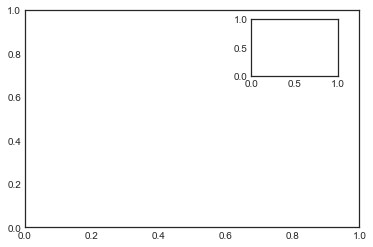

In [2]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

The equivalent of this command within the object-oriented interface is ``fig.add_axes()``. Let's use this to create two vertically stacked axes:

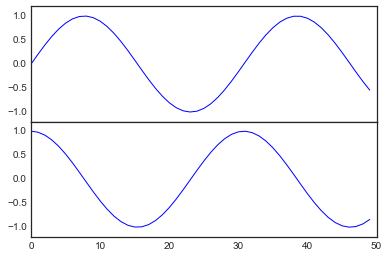

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

## ``plt.subplot``: Simple Grids of Subplots

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create.
The lowest level of these is ``plt.subplot()``, which creates a single subplot within a grid.
As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

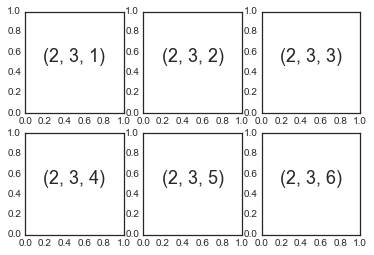

In [4]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

The command ``plt.subplots_adjust`` can be used to adjust the spacing between these plots.
The following code uses the equivalent object-oriented command, ``fig.add_subplot()``:

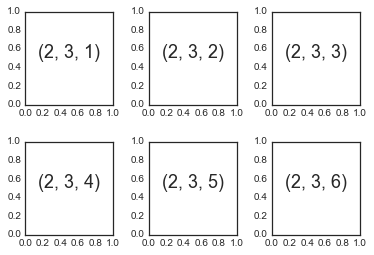

In [5]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

We've used the ``hspace`` and ``wspace`` arguments of ``plt.subplots_adjust``, which specify the spacing along the height and width of the figure, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

## ``plt.subplots``: The Whole Grid in One Go

The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, ``plt.subplots()`` is the easier tool to use (note the ``s`` at the end of ``subplots``). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

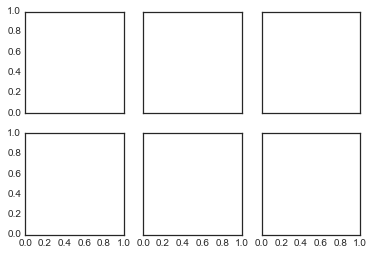

In [6]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Note that by specifying ``sharex`` and ``sharey``, we've automatically removed inner labels on the grid to make the plot cleaner.
The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

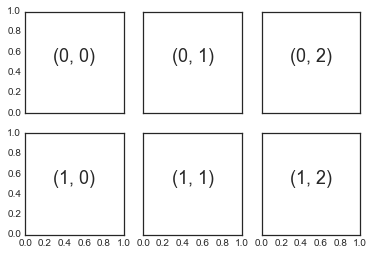

In [7]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

In comparison to ``plt.subplot()``, ``plt.subplots()`` is more consistent with Python's conventional 0-based indexing.

## ``plt.GridSpec``: More Complicated Arrangements

To go beyond a regular grid to subplots that span multiple rows and columns, ``plt.GridSpec()`` is the best tool.
The ``plt.GridSpec()`` object does not create a plot by itself; it is simply a convenient interface that is recognized by the ``plt.subplot()`` command.
For example, a gridspec for a grid of two rows and three columns with some specified width and height space looks like this:

In [8]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

From this we can specify subplot locations and extents using the familiary Python slicing syntax:

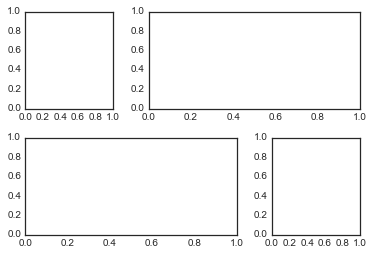

In [9]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

This type of flexible grid alignment has a wide range of uses.
I most often use it when creating multi-axes histogram plots like the ones shown here:

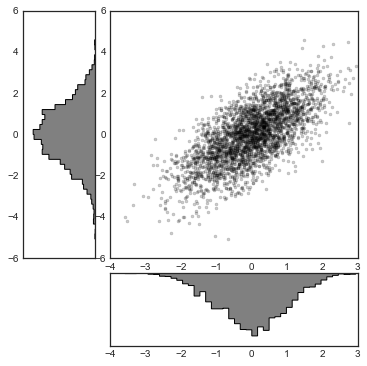

In [10]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

This type of distribution plotted alongside its margins is common enough that it has its own plotting API in the Seaborn package; see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb) for more details.

# Text and Annotation

Creating a good visualization involves guiding the reader so that the figure tells a story.
In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary.
Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this.
Let's take a look at some data and how we might visualize and annotate it to help convey interesting information. We'll start by setting up the notebook for plotting and  importing the functions we will use:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

## Example: Effect of Holidays on US Births

Let's return to some data we worked with earler, in ["Example: Birthrate Data"](03.09-Pivot-Tables.ipynb#Example:-Birthrate-Data), where we generated a plot of average births over the course of the calendar year; as already mentioned, that this data can be downloaded at https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv.

We'll start with the same cleaning procedure we used there, and plot the results:

In [2]:
births = pd.read_csv('data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

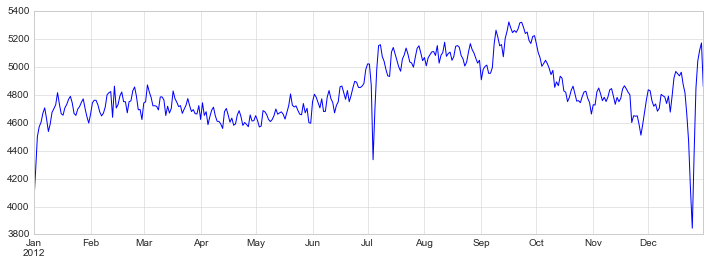

In [3]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

When we're communicating data like this, it is often useful to annotate certain features of the plot to draw the reader's attention.
This can be done manually with the ``plt.text``/``ax.text`` command, which will place text at a particular x/y value:

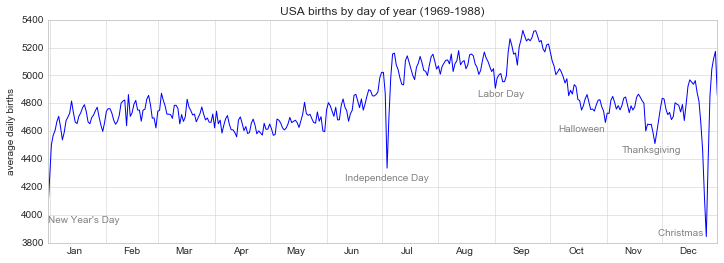

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

The ``ax.text`` method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text.
Here we used ``ha='right'`` and ``ha='center'``, where ``ha`` is short for *horizonal alignment*.
See the docstring of ``plt.text()`` and of ``mpl.text.Text()`` for more information on available options.

## Transforms and Text Position

In the previous example, we have anchored our text annotations to data locations. Sometimes it's preferable to anchor the text to a position on the axes or figure, independent of the data. In Matplotlib, this is done by modifying the *transform*.

Any graphics display framework needs some scheme for translating between coordinate systems.
For example, a data point at $(x, y) = (1, 1)$ needs to somehow be represented at a certain location on the figure, which in turn needs to be represented in pixels on the screen.
Mathematically, such coordinate transformations are relatively straightforward, and Matplotlib has a well-developed set of tools that it uses internally to perform them (these tools can be explored in the ``matplotlib.transforms`` submodule).

The average user rarely needs to worry about the details of these transforms, but it is helpful knowledge to have when considering the placement of text on a figure. There are three pre-defined transforms that can be useful in this situation:

- ``ax.transData``: Transform associated with data coordinates
- ``ax.transAxes``: Transform associated with the axes (in units of axes dimensions)
- ``fig.transFigure``: Transform associated with the figure (in units of figure dimensions)

Here let's look at an example of drawing text at various locations using these transforms:

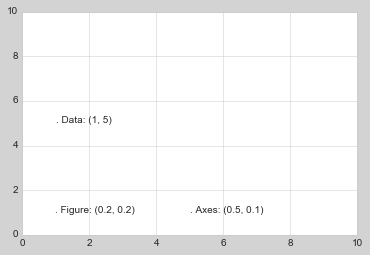

In [5]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

Note that by default, the text is aligned above and to the left of the specified coordinates: here the "." at the beginning of each string will approximately mark the given coordinate location.

The ``transData`` coordinates give the usual data coordinates associated with the x- and y-axis labels.
The ``transAxes`` coordinates give the location from the bottom-left corner of the axes (here the white box), as a fraction of the axes size.
The ``transFigure`` coordinates are similar, but specify the position from the bottom-left of the figure (here the gray box), as a fraction of the figure size.

Notice now that if we change the axes limits, it is only the ``transData`` coordinates that will be affected, while the others remain stationary:

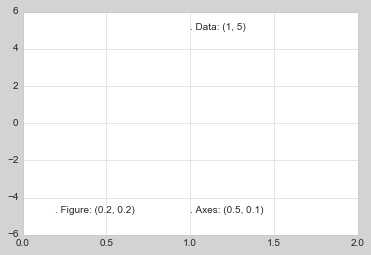

In [6]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

This behavior can be seen more clearly by changing the axes limits interactively: if you are executing this code in a notebook, you can make that happen by changing ``%matplotlib inline`` to ``%matplotlib notebook`` and using each plot's menu to interact with the plot.

## Arrows and Annotation

Along with tick marks and text, another useful annotation mark is the simple arrow.

Drawing arrows in Matplotlib is often much harder than you'd bargain for.
While there is a ``plt.arrow()`` function available, I wouldn't suggest using it: the arrows it creates are SVG objects that will be subject to the varying aspect ratio of your plots, and the result is rarely what the user intended.
Instead, I'd suggest using the ``plt.annotate()`` function.
This function creates some text and an arrow, and the arrows can be very flexibly specified.

Here we'll use ``annotate`` with several of its options:

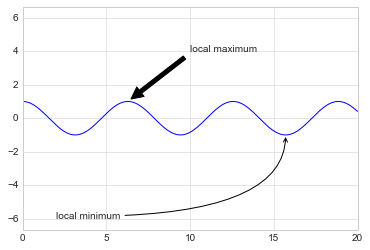

In [7]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

The arrow style is controlled through the ``arrowprops`` dictionary, which has numerous options available.
These options are fairly well-documented in Matplotlib's online documentation, so rather than repeating them here it is probably more useful to quickly show some of the possibilities.
Let's demonstrate several of the possible options using the birthrate plot from before:

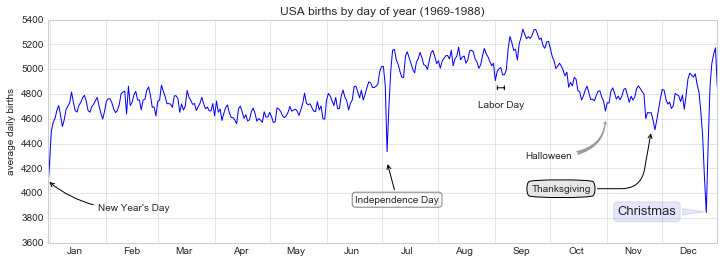

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

You'll notice that the specifications of the arrows and text boxes are very detailed: this gives you the power to create nearly any arrow style you wish.
Unfortunately, it also means that these sorts of features often must be manually tweaked, a process that can be very time consuming when producing publication-quality graphics!
Finally, I'll note that the preceding mix of styles is by no means best practice for presenting data, but rather included as a demonstration of some of the available options.

More discussion and examples of available arrow and annotation styles can be found in the Matplotlib gallery, in particular the [Annotation Demo](http://matplotlib.org/examples/pylab_examples/annotation_demo2.html).

# Customizing Ticks

Matplotlib's default tick locators and formatters are designed to be generally sufficient in many common situations, but are in no way optimal for every plot. This section will give several examples of adjusting the tick locations and formatting for the particular plot type you're interested in.

Before we go into examples, it will be best for us to understand further the object hierarchy of Matplotlib plots.
Matplotlib aims to have a Python object representing everything that appears on the plot: for example, recall that the ``figure`` is the bounding box within which plot elements appear.
Each Matplotlib object can also act as a container of sub-objects: for example, each ``figure`` can contain one or more ``axes`` objects, each of which in turn contain other objects representing plot contents.

The tick marks are no exception. Each ``axes`` has attributes ``xaxis`` and ``yaxis``, which in turn have attributes that contain all the properties of the lines, ticks, and labels that make up the axes.

## Major and Minor Ticks

Within each axis, there is the concept of a *major* tick mark, and a *minor* tick mark. As the names would imply, major ticks are usually bigger or more pronounced, while minor ticks are usually smaller. By default, Matplotlib rarely makes use of minor ticks, but one place you can see them is within logarithmic plots:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

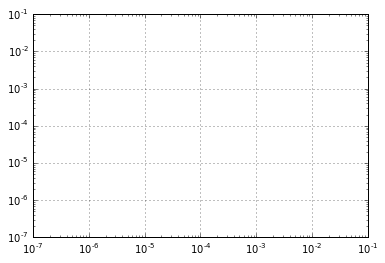

In [2]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

We see here that each major tick shows a large tickmark and a label, while each minor tick shows a smaller tickmark with no label.

These tick properties—locations and labels—that is, can be customized by setting the ``formatter`` and ``locator`` objects of each axis. Let's examine these for the x axis of the just shown plot:

In [3]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [4]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

We see that both major and minor tick labels have their locations specified by a ``LogLocator`` (which makes sense for a logarithmic plot). Minor ticks, though, have their labels formatted by a ``NullFormatter``: this says that no labels will be shown.

We'll now show a few examples of setting these locators and formatters for various plots.

## Hiding Ticks or Labels

Perhaps the most common tick/label formatting operation is the act of hiding ticks or labels.
This can be done using ``plt.NullLocator()`` and ``plt.NullFormatter()``, as shown here:

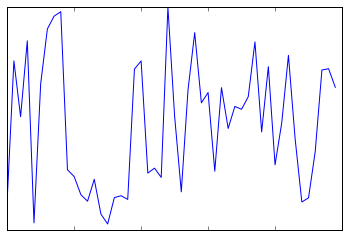

In [5]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

Notice that we've removed the labels (but kept the ticks/gridlines) from the x axis, and removed the ticks (and thus the labels as well) from the y axis.
Having no ticks at all can be useful in many situations—for example, when you want to show a grid of images.
For instance, consider the following figure, which includes images of different faces, an example often used in supervised machine learning problems (see, for example, [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)):

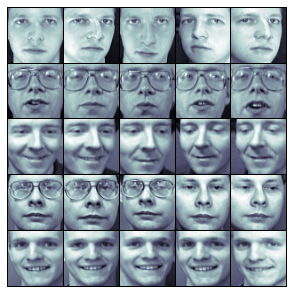

In [6]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

Notice that each image has its own axes, and we've set the locators to null because the tick values (pixel number in this case) do not convey relevant information for this particular visualization.

## Reducing or Increasing the Number of Ticks

One common problem with the default settings is that smaller subplots can end up with crowded labels.
We can see this in the plot grid shown here:

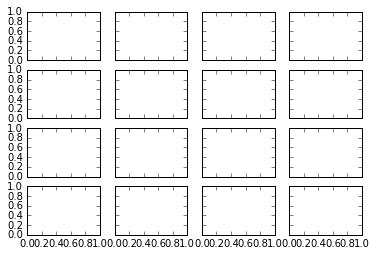

In [7]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

Particularly for the x ticks, the numbers nearly overlap and make them quite difficult to decipher.
We can fix this with the ``plt.MaxNLocator()``, which allows us to specify the maximum number of ticks that will be displayed.
Given this maximum number, Matplotlib will use internal logic to choose the particular tick locations:

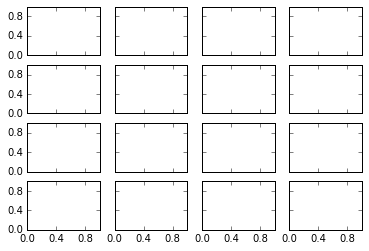

In [8]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

This makes things much cleaner. If you want even more control over the locations of regularly-spaced ticks, you might also use ``plt.MultipleLocator``, which we'll discuss in the following section.

## Fancy Tick Formats

Matplotlib's default tick formatting can leave a lot to be desired: it works well as a broad default, but sometimes you'd like do do something more.
Consider this plot of a sine and a cosine:

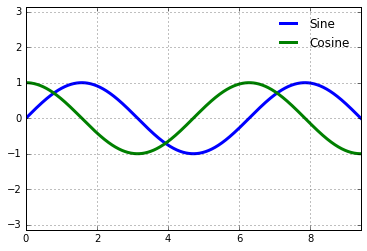

In [9]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

There are a couple changes we might like to make. First, it's more natural for this data to space the ticks and grid lines in multiples of $\pi$. We can do this by setting a ``MultipleLocator``, which locates ticks at a multiple of the number you provide. For good measure, we'll add both major and minor ticks in multiples of $\pi/4$:

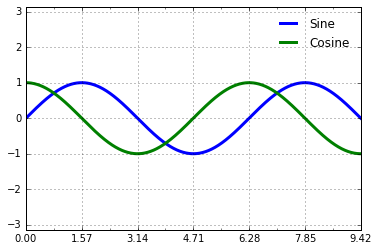

In [10]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

But now these tick labels look a little bit silly: we can see that they are multiples of $\pi$, but the decimal representation does not immediately convey this.
To fix this, we can change the tick formatter. There's no built-in formatter for what we want to do, so we'll instead use ``plt.FuncFormatter``, which accepts a user-defined function giving fine-grained control over the tick outputs:

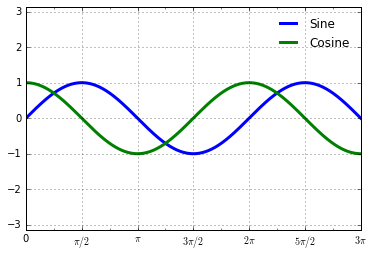

In [11]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

This is much better! Notice that we've made use of Matplotlib's LaTeX support, specified by enclosing the string within dollar signs. This is very convenient for display of mathematical symbols and formulae: in this case, ``"$\pi$"`` is rendered as the Greek character $\pi$.

The ``plt.FuncFormatter()`` offers extremely fine-grained control over the appearance of your plot ticks, and comes in very handy when preparing plots for presentation or publication.

## Summary of Formatters and Locators

We've mentioned a couple of the available formatters and locators.
We'll conclude this section by briefly listing all the built-in locator and formatter options. For more information on any of these, refer to the docstrings or to the Matplotlib online documentaion.
Each of the following is available in the ``plt`` namespace:

Locator class        | Description
---------------------|-------------
``NullLocator``      | No ticks
``FixedLocator``     | Tick locations are fixed
``IndexLocator``     | Locator for index plots (e.g., where x = range(len(y)))
``LinearLocator``    | Evenly spaced ticks from min to max
``LogLocator``       | Logarithmically ticks from min to max
``MultipleLocator``  | Ticks and range are a multiple of base
``MaxNLocator``      | Finds up to a max number of ticks at nice locations
``AutoLocator``      | (Default.) MaxNLocator with simple defaults.
``AutoMinorLocator`` | Locator for minor ticks

Formatter Class       | Description
----------------------|---------------
``NullFormatter``     | No labels on the ticks
``IndexFormatter``    | Set the strings from a list of labels
``FixedFormatter``    | Set the strings manually for the labels
``FuncFormatter``     | User-defined function sets the labels
``FormatStrFormatter``| Use a format string for each value
``ScalarFormatter``   | (Default.) Formatter for scalar values
``LogFormatter``      | Default formatter for log axes

We'll see further examples of these through the remainder of the book.

# Customizing Matplotlib: Configurations and Stylesheets

Matplotlib's default plot settings are often the subject of complaint among its users.
While much is slated to change in the 2.0 Matplotlib release in late 2016, the ability to customize default settings helps bring the package inline with your own aesthetic preferences.

Here we'll walk through some of Matplotlib's runtime configuration (rc) options, and take a look at the newer *stylesheets* feature, which contains some nice sets of default configurations.

## Plot Customization by Hand

Through this chapter, we've seen how it is possible to tweak individual plot settings to end up with something that looks a little bit nicer than the default.
It's possible to do these customizations for each individual plot.
For example, here is a fairly drab default histogram:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

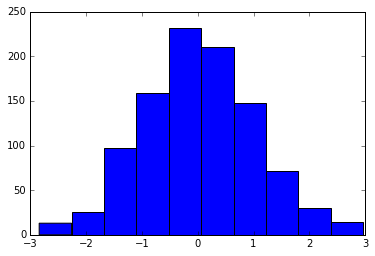

In [2]:
x = np.random.randn(1000)
plt.hist(x);

We can adjust this by hand to make it a much more visually pleasing plot:

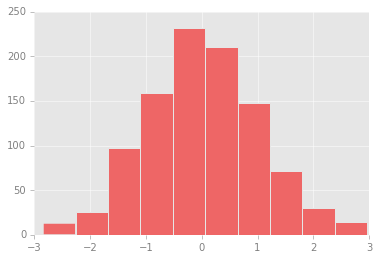

In [3]:
# use a gray background
ax = plt.axes(axisbg='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

This looks better, and you may recognize the look as inspired by the look of the R language's ggplot visualization package.
But this took a whole lot of effort!
We definitely do not want to have to do all that tweaking each time we create a plot.
Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

## Changing the Defaults: ``rcParams``

Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create.
This configuration can be adjusted at any time using the ``plt.rc`` convenience routine.
Let's see what it looks like to modify the rc parameters so that our default plot will look similar to what we did before.

We'll start by saving a copy of the current ``rcParams`` dictionary, so we can easily reset these changes in the current session:

In [4]:
IPython_default = plt.rcParams.copy()

Now we can use the ``plt.rc`` function to change some of these settings:

In [5]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

With these settings defined, we can now create a plot and see our settings in action:

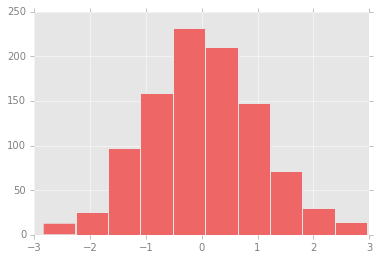

In [6]:
plt.hist(x);

Let's see what simple line plots look like with these rc parameters:

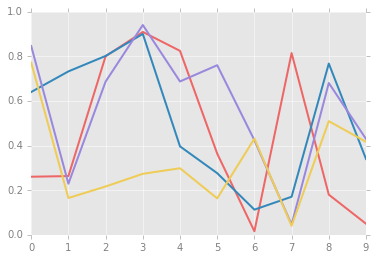

In [7]:
for i in range(4):
    plt.plot(np.random.rand(10))

I find this much more aesthetically pleasing than the default styling.
If you disagree with my aesthetic sense, the good news is that you can adjust the rc parameters to suit your own tastes!
These settings can be saved in a *.matplotlibrc* file, which you can read about in the [Matplotlib documentation](http://Matplotlib.org/users/customizing.html).
That said, I prefer to customize Matplotlib using its stylesheets instead.

## Stylesheets

The version 1.4 release of Matplotlib in August 2014 added a very convenient ``style`` module, which includes a number of new default stylesheets, as well as the ability to create and package your own styles. These stylesheets are formatted similarly to the *.matplotlibrc* files mentioned earlier, but must be named with a *.mplstyle* extension.

Even if you don't create your own style, the stylesheets included by default are extremely useful.
The available styles are listed in ``plt.style.available``—here I'll list only the first five for brevity:

In [8]:
plt.style.available[:5]

['fivethirtyeight',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'ggplot',
 'grayscale']

The basic way to switch to a stylesheet is to call

``` python
plt.style.use('stylename')
```

But keep in mind that this will change the style for the rest of the session!
Alternatively, you can use the style context manager, which sets a style temporarily:

``` python
with plt.style.context('stylename'):
    make_a_plot()
```


Let's create a function that will make two basic types of plot:

In [9]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

We'll use this to explore how these plots look using the various built-in styles.

### Default style

The default style is what we've been seeing so far throughout the book; we'll start with that.
First, let's reset our runtime configuration to the notebook default:

In [10]:
# reset rcParams
plt.rcParams.update(IPython_default);

Now let's see how it looks:

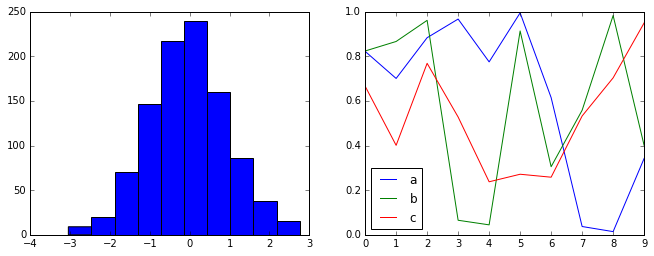

In [11]:
hist_and_lines()

### FiveThiryEight style

The ``fivethirtyeight`` style mimics the graphics found on the popular [FiveThirtyEight website](https://fivethirtyeight.com).
As you can see here, it is typified by bold colors, thick lines, and transparent axes:

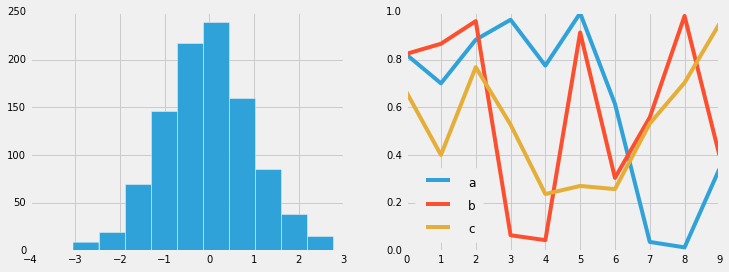

In [12]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

The ``ggplot`` package in the R language is a very popular visualization tool.
Matplotlib's ``ggplot`` style mimics the default styles from that package:

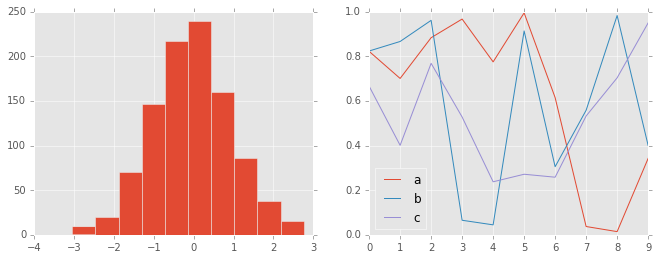

In [13]:
with plt.style.context('ggplot'):
    hist_and_lines()

### *Bayesian Methods for Hackers( style

There is a very nice short online book called [*Probabilistic Programming and Bayesian Methods for Hackers*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/); it features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually-appealing style throughout the book.
This style is reproduced in the ``bmh`` stylesheet:

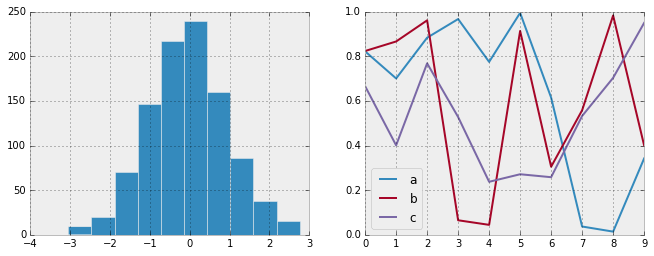

In [14]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark background

For figures used within presentations, it is often useful to have a dark rather than light background.
The ``dark_background`` style provides this:

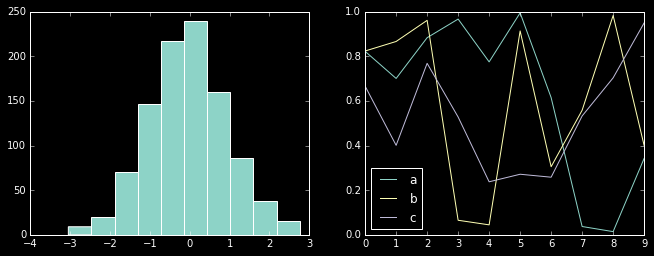

In [15]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale

Sometimes you might find yourself preparing figures for a print publication that does not accept color figures.
For this, the ``grayscale`` style, shown here, can be very useful:

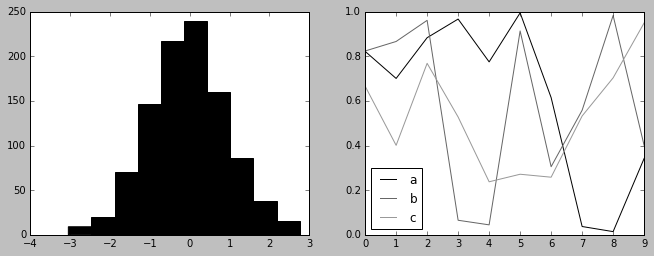

In [16]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn style

Matplotlib also has stylesheets inspired by the Seaborn library (discussed more fully in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).
As we will see, these styles are loaded automatically when Seaborn is imported into a notebook.
I've found these settings to be very nice, and tend to use them as defaults in my own data exploration.

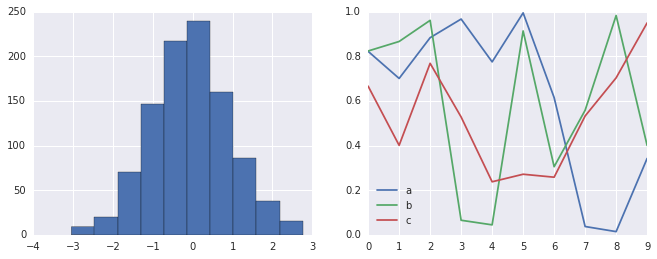

In [17]:
import seaborn
hist_and_lines()

With all of these built-in options for various plot styles, Matplotlib becomes much more useful for both interactive visualization and creation of figures for publication.
Throughout this book, I will generally use one or more of these style conventions when creating plots.

# Three-Dimensional Plotting in Matplotlib

Matplotlib was initially designed with only two-dimensional plotting in mind.
Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization.
three-dimensional plots are enabled by importing the ``mplot3d`` toolkit, included with the main Matplotlib installation:

In [1]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword ``projection='3d'`` to any of the normal axes creation routines:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

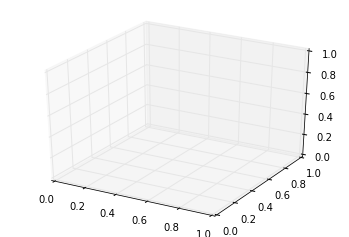

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types. 
Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook; recall that to use interactive figures, you can use ``%matplotlib notebook`` rather than ``%matplotlib inline`` when running this code.

## Three-dimensional Points and Lines

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples.
In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ``ax.plot3D`` and ``ax.scatter3D`` functions.
The call signature for these is nearly identical to that of their two-dimensional counterparts, so you can refer to [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) and [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb) for more information on controlling the output.
Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

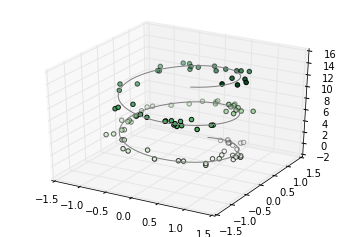

In [4]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page.
While the three-dimensional effect is sometimes difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points.

## Three-dimensional Contour Plots

Analogous to the contour plots we explored in [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb), ``mplot3d`` contains tools to create three-dimensional relief plots using the same inputs.
Like two-dimensional ``ax.contour`` plots, ``ax.contour3D`` requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point.
Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function:

In [5]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

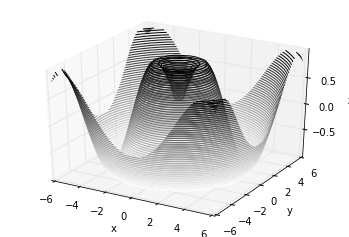

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Sometimes the default viewing angle is not optimal, in which case we can use the ``view_init`` method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

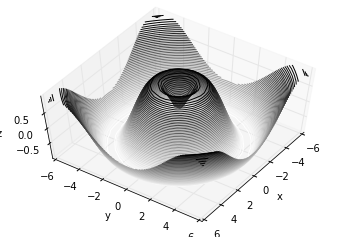

In [7]:
ax.view_init(60, 35)
fig

Again, note that this type of rotation can be accomplished interactively by clicking and dragging when using one of Matplotlib's interactive backends.

## Wireframes and Surface Plots

Two other types of three-dimensional plots that work on gridded data are wireframes and surface plots.
These take a grid of values and project it onto the specified three-dimensional surface, and can make the resulting three-dimensional forms quite easy to visualize.
Here's an example of using a wireframe:

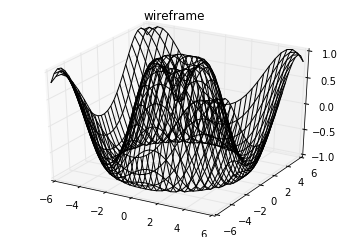

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon.
Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

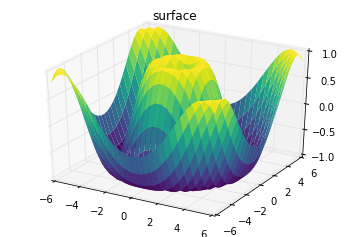

In [9]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

Note that though the grid of values for a surface plot needs to be two-dimensional, it need not be rectilinear.
Here is an example of creating a partial polar grid, which when used with the ``surface3D`` plot can give us a slice into the function we're visualizing:

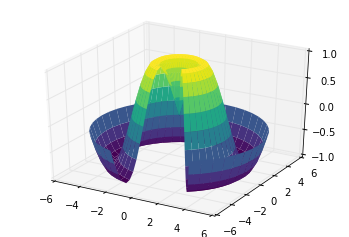

In [10]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

## Surface Triangulations

For some applications, the evenly sampled grids required by the above routines is overly restrictive and inconvenient.
In these situations, the triangulation-based plots can be very useful.
What if rather than an even draw from a Cartesian or a polar grid, we instead have a set of random draws?

In [11]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

We could create a scatter plot of the points to get an idea of the surface we're sampling from:

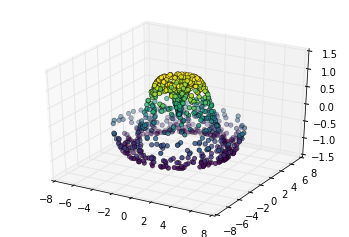

In [12]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

This leaves a lot to be desired.
The function that will help us in this case is ``ax.plot_trisurf``, which creates a surface by first finding a set of triangles formed between adjacent points (remember that x, y, and z here are one-dimensional arrays):

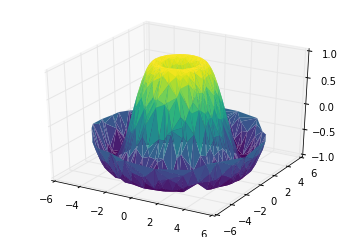

In [13]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

The result is certainly not as clean as when it is plotted with a grid, but the flexibility of such a triangulation allows for some really interesting three-dimensional plots.
For example, it is actually possible to plot a three-dimensional Möbius strip using this, as we'll see next.

### Example: Visualizing a Möbius strip

A Möbius strip is similar to a strip of paper glued into a loop with a half-twist.
Topologically, it's quite interesting because despite appearances it has only a single side!
Here we will visualize such an object using Matplotlib's three-dimensional tools.
The key to creating the Möbius strip is to think about it's parametrization: it's a two-dimensional strip, so we need two intrinsic dimensions. Let's call them $\theta$, which ranges from $0$ to $2\pi$ around the loop, and $w$ which ranges from -1 to 1 across the width of the strip:

In [14]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

Now from this parametrization, we must determine the *(x, y, z)* positions of the embedded strip.

Thinking about it, we might realize that there are two rotations happening: one is the position of the loop about its center (what we've called $\theta$), while the other is the twisting of the strip about its axis (we'll call this $\phi$). For a Möbius strip, we must have the strip makes half a twist during a full loop, or $\Delta\phi = \Delta\theta/2$.

In [15]:
phi = 0.5 * theta

Now we use our recollection of trigonometry to derive the three-dimensional embedding.
We'll define $r$, the distance of each point from the center, and use this to find the embedded $(x, y, z)$ coordinates:

In [16]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Finally, to plot the object, we must make sure the triangulation is correct. The best way to do this is to define the triangulation *within the underlying parametrization*, and then let Matplotlib project this triangulation into the three-dimensional space of the Möbius strip.
This can be accomplished as follows:

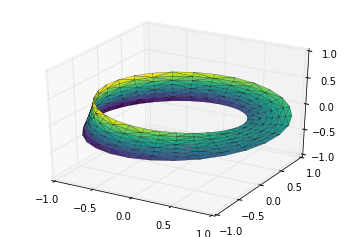

In [17]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

Combining all of these techniques, it is possible to create and display a wide variety of three-dimensional objects and patterns in Matplotlib.

# Geographic Data with Basemap

One common type of visualization in data science is that of geographic data.
Matplotlib's main tool for this type of visualization is the Basemap toolkit, which is one of several Matplotlib toolkits which lives under the ``mpl_toolkits`` namespace.
Admittedly, Basemap feels a bit clunky to use, and often even simple visualizations take much longer to render than you might hope.
More modern solutions such as leaflet or the Google Maps API may be a better choice for more intensive map visualizations.
Still, Basemap is a useful tool for Python users to have in their virtual toolbelts.
In this section, we'll show several examples of the type of map visualization that is possible with this toolkit.

Installation of Basemap is straightforward; if you're using conda you can type this and the package will be downloaded:

```
$ conda install basemap
```

We add just a single new import to our standard boilerplate:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Once you have the Basemap toolkit installed and imported, geographic plots are just a few lines away (the graphics in the following also requires the ``PIL`` package in Python 2, or the ``pillow`` package in Python 3):

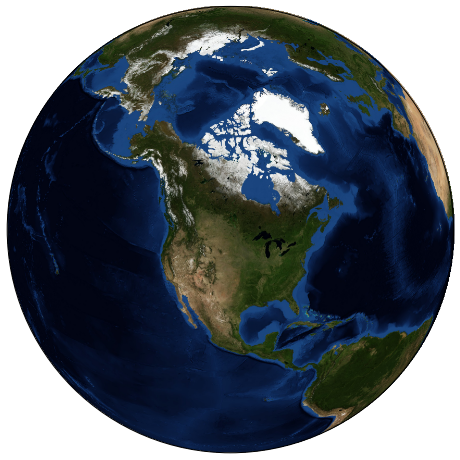

In [2]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

The meaning of the arguments to ``Basemap`` will be discussed momentarily.

The useful thing is that the globe shown here is not a mere image; it is a fully-functioning Matplotlib axes that understands spherical coordinates and which allows us to easily overplot data on the map!
For example, we can use a different map projection, zoom-in to North America and plot the location of Seattle.
We'll use an etopo image (which shows topographical features both on land and under the ocean) as the map background:

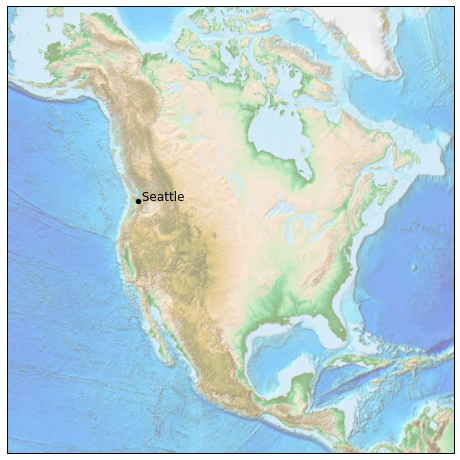

In [3]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

This gives you a brief glimpse into the sort of geographic visualizations that are possible with just a few lines of Python.
We'll now discuss the features of Basemap in more depth, and provide several examples of visualizing map data.
Using these brief examples as building blocks, you should be able to create nearly any map visualization that you desire.

## Map Projections

The first thing to decide when using maps is what projection to use.
You're probably familiar with the fact that it is impossible to project a spherical map, such as that of the Earth, onto a flat surface without somehow distorting it or breaking its continuity.
These projections have been developed over the course of human history, and there are a lot of choices!
Depending on the intended use of the map projection, there are certain map features (e.g., direction, area, distance, shape, or other considerations) that are useful to maintain.

The Basemap package implements several dozen such projections, all referenced by a short format code.
Here we'll briefly demonstrate some of the more common ones.

We'll start by defining a convenience routine to draw our world map along with the longitude and latitude lines:

In [4]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

### Cylindrical projections

The simplest of map projections are cylindrical projections, in which lines of constant latitude and longitude are mapped to horizontal and vertical lines, respectively.
This type of mapping represents equatorial regions quite well, but results in extreme distortions near the poles.
The spacing of latitude lines varies between different cylindrical projections, leading to different conservation properties, and different distortion near the poles.
In the following figure we show an example of the *equidistant cylindrical projection*, which chooses a latitude scaling that preserves distances along meridians.
Other cylindrical projections are the Mercator (``projection='merc'``) and the cylindrical equal area (``projection='cea'``) projections.

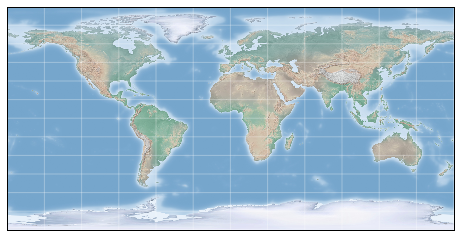

In [5]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

The additional arguments to Basemap for this view specify the latitude (``lat``) and longitude (``lon``) of the lower-left corner (``llcrnr``) and upper-right corner (``urcrnr``) for the desired map, in units of degrees.

### Pseudo-cylindrical projections

Pseudo-cylindrical projections relax the requirement that meridians (lines of constant longitude) remain vertical; this can give better properties near the poles of the projection.
The Mollweide projection (``projection='moll'``) is one common example of this, in which all meridians are elliptical arcs.
It is constructed so as to preserve area across the map: though there are distortions near the poles, the area of small patches reflects the true area.
Other pseudo-cylindrical projections are the sinusoidal (``projection='sinu'``) and Robinson (``projection='robin'``) projections.

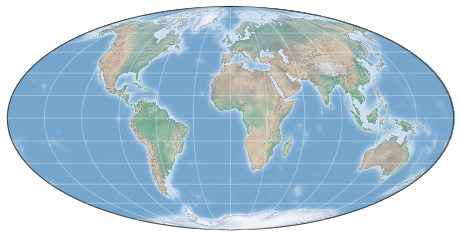

In [6]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

The extra arguments to Basemap here refer to the central latitude (``lat_0``) and longitude (``lon_0``) for the desired map.

### Perspective projections

Perspective projections are constructed using a particular choice of perspective point, similar to if you photographed the Earth from a particular point in space (a point which, for some projections, technically lies within the Earth!).
One common example is the orthographic projection (``projection='ortho'``), which shows one side of the globe as seen from a viewer at a very long distance. As such, it can show only half the globe at a time.
Other perspective-based projections include the gnomonic projection (``projection='gnom'``) and stereographic projection (``projection='stere'``).
These are often the most useful for showing small portions of the map.

Here is an example of the orthographic projection:

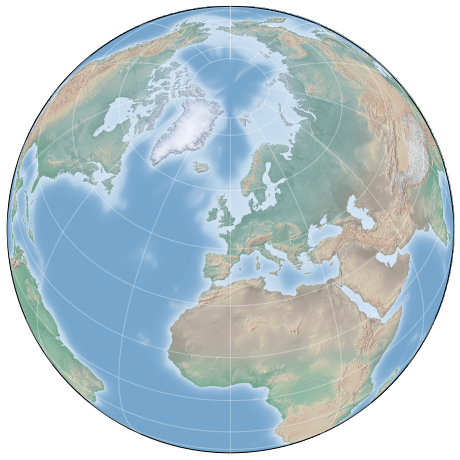

In [7]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

### Conic projections

A Conic projection projects the map onto a single cone, which is then unrolled.
This can lead to very good local properties, but regions far from the focus point of the cone may become very distorted.
One example of this is the Lambert Conformal Conic projection (``projection='lcc'``), which we saw earlier in the map of North America.
It projects the map onto a cone arranged in such a way that two standard parallels (specified in Basemap by ``lat_1`` and ``lat_2``) have well-represented distances, with scale decreasing between them and increasing outside of them.
Other useful conic projections are the equidistant conic projection (``projection='eqdc'``) and the Albers equal-area projection (``projection='aea'``).
Conic projections, like perspective projections, tend to be good choices for representing small to medium patches of the globe.

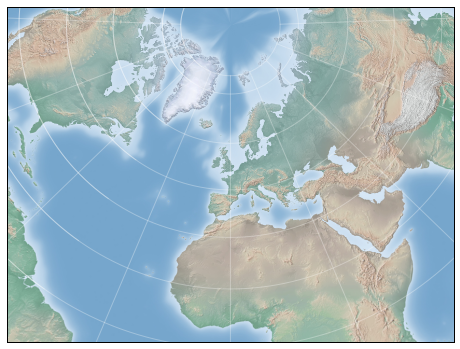

In [8]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

### Other projections

If you're going to do much with map-based visualizations, I encourage you to read up on other available projections, along with their properties, advantages, and disadvantages.
Most likely, they are available in the [Basemap package](http://matplotlib.org/basemap/users/mapsetup.html).
If you dig deep enough into this topic, you'll find an incredible subculture of geo-viz geeks who will be ready to argue fervently in support of their favorite projection for any given application! 

## Drawing a Map Background

Earlier we saw the ``bluemarble()`` and ``shadedrelief()`` methods for projecting global images on the map, as well as the ``drawparallels()`` and ``drawmeridians()`` methods for drawing lines of constant latitude and longitude.
The Basemap package contains a range of useful functions for drawing borders of physical features like continents, oceans, lakes, and rivers, as well as political boundaries such as countries and US states and counties.
The following are some of the available drawing functions that you may wish to explore using IPython's help features:

- **Physical boundaries and bodies of water**
  - ``drawcoastlines()``: Draw continental coast lines
  - ``drawlsmask()``: Draw a mask between the land and sea, for use with projecting images on one or the other
  - ``drawmapboundary()``: Draw the map boundary, including the fill color for oceans.
  - ``drawrivers()``: Draw rivers on the map
  - ``fillcontinents()``: Fill the continents with a given color; optionally fill lakes with another color

- **Political boundaries**
  - ``drawcountries()``: Draw country boundaries
  - ``drawstates()``: Draw US state boundaries
  - ``drawcounties()``: Draw US county boundaries

- **Map features**
  - ``drawgreatcircle()``: Draw a great circle between two points
  - ``drawparallels()``: Draw lines of constant latitude
  - ``drawmeridians()``: Draw lines of constant longitude
  - ``drawmapscale()``: Draw a linear scale on the map

- **Whole-globe images**
  - ``bluemarble()``: Project NASA's blue marble image onto the map
  - ``shadedrelief()``: Project a shaded relief image onto the map
  - ``etopo()``: Draw an etopo relief image onto the map
  - ``warpimage()``: Project a user-provided image onto the map

For the boundary-based features, you must set the desired resolution when creating a Basemap image.
The ``resolution`` argument of the ``Basemap`` class sets the level of detail in boundaries, either ``'c'`` (crude), ``'l'`` (low), ``'i'`` (intermediate), ``'h'`` (high), ``'f'`` (full), or ``None`` if no boundaries will be used.
This choice is important: setting high-resolution boundaries on a global map, for example, can be *very* slow.

Here's an example of drawing land/sea boundaries, and the effect of the resolution parameter.
We'll create both a low- and high-resolution map of Scotland's beautiful Isle of Skye.
It's located at 57.3°N, 6.2°W, and a map of 90,000 × 120,000 kilometers shows it well:

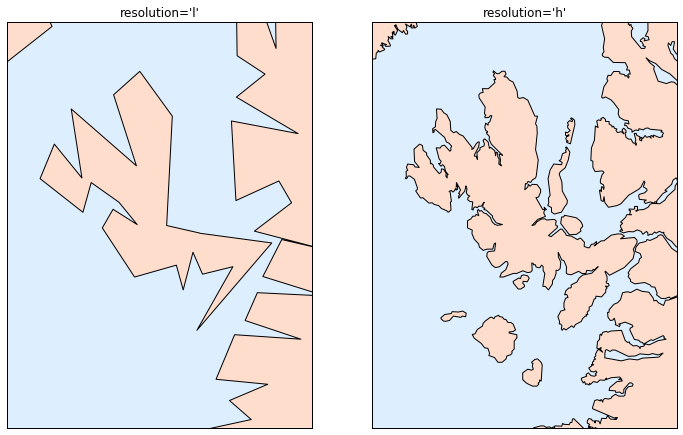

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
                width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));

Notice that the low-resolution coastlines are not suitable for this level of zoom, while high-resolution works just fine.
The low level would work just fine for a global view, however, and would be *much* faster than loading the high-resolution border data for the entire globe!
It might require some experimentation to find the correct resolution parameter for a given view: the best route is to start with a fast, low-resolution plot and increase the resolution as needed.

## Plotting Data on Maps

Perhaps the most useful piece of the Basemap toolkit is the ability to over-plot a variety of data onto a map background.
For simple plotting and text, any ``plt`` function works on the map; you can use the ``Basemap`` instance to project latitude and longitude coordinates to ``(x, y)`` coordinates for plotting with ``plt``, as we saw earlier in the Seattle example.

In addition to this, there are many map-specific functions available as methods of the ``Basemap`` instance.
These work very similarly to their standard Matplotlib counterparts, but have an additional Boolean argument ``latlon``, which if set to ``True`` allows you to pass raw latitudes and longitudes to the method, rather than projected ``(x, y)`` coordinates.

Some of these map-specific methods are:

- ``contour()``/``contourf()`` : Draw contour lines or filled contours
- ``imshow()``: Draw an image
- ``pcolor()``/``pcolormesh()`` : Draw a pseudocolor plot for irregular/regular meshes
- ``plot()``: Draw lines and/or markers.
- ``scatter()``: Draw points with markers.
- ``quiver()``: Draw vectors.
- ``barbs()``: Draw wind barbs.
- ``drawgreatcircle()``: Draw a great circle.

We'll see some examples of a few of these as we continue.
For more information on these functions, including several example plots, see the [online Basemap documentation](http://matplotlib.org/basemap/).

## Example: California Cities

Recall that in [Customizing Plot Legends](04.06-Customizing-Legends.ipynb), we demonstrated the use of size and color in a scatter plot to convey information about the location, size, and population of California cities.
Here, we'll create this plot again, but using Basemap to put the data in context.

We start with loading the data, as we did before:

In [10]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

Next, we set up the map projection, scatter the data, and then create a colorbar and legend:

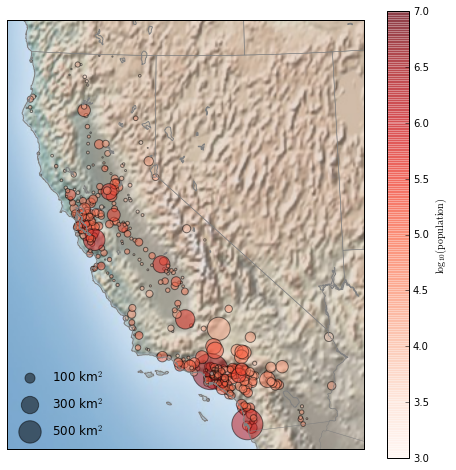

In [11]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

This shows us roughly where larger populations of people have settled in California: they are clustered near the coast in the Los Angeles and San Francisco areas, stretched along the highways in the flat central valley, and avoiding almost completely the mountainous regions along the borders of the state.

## Example: Surface Temperature Data

As an example of visualizing some more continuous geographic data, let's consider the "polar vortex" that hit the eastern half of the United States in January of 2014.
A great source for any sort of climatic data is [NASA's Goddard Institute for Space Studies](http://data.giss.nasa.gov/).
Here we'll use the GIS 250 temperature data, which we can download using shell commands (these commands may have to be modified on Windows machines).
The data used here was downloaded on 6/12/2016, and the file size is approximately 9MB:

In [12]:
# !curl -O http://data.giss.nasa.gov/pub/gistemp/gistemp250.nc.gz
# !gunzip gistemp250.nc.gz

The data comes in NetCDF format, which can be read in Python by the ``netCDF4`` library.
You can install this library as shown here

```
$ conda install netcdf4
```

We read the data as follows:

In [13]:
from netCDF4 import Dataset
data = Dataset('gistemp250.nc')

The file contains many global temperature readings on a variety of dates; we need to select the index of the date we're interested in—in this case, January 15, 2014:

In [14]:
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2014, 1, 15),
                       data.variables['time'])

Now we can load the latitude and longitude data, as well as the temperature anomaly for this index:

In [15]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

Finally, we'll use the ``pcolormesh()`` method to draw a color mesh of the data.
We'll look at North America, and use a shaded relief map in the background.
Note that for this data we specifically chose a divergent colormap, which has a neutral color at zero and two contrasting colors at negative and positive values.
We'll also lightly draw the coastlines over the colors for reference:

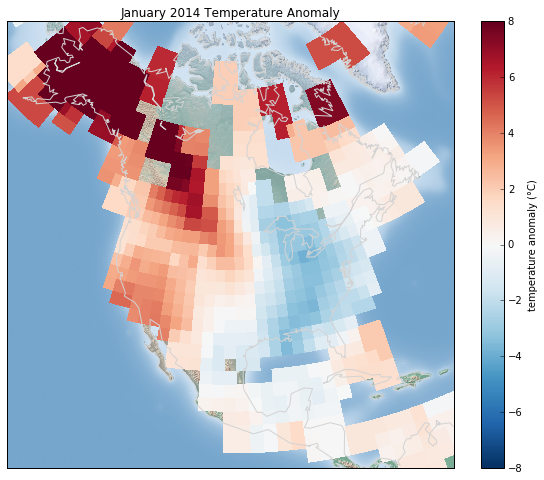

In [16]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c',
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anomaly,
             latlon=True, cmap='RdBu_r')
plt.clim(-8, 8)
m.drawcoastlines(color='lightgray')

plt.title('January 2014 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (°C)');

The data paints a picture of the localized, extreme temperature anomalies that happened during that month.
The eastern half of the United States was much colder than normal, while the western half and Alaska were much warmer.
Regions with no recorded temperature show the map background.